# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Load data
data = pd.read_csv("Customer_Churn.csv")
data.head() #Check the first 5 entries

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing

In [4]:
data.info()
#Check the number of non-null values and the data type of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Strip strings in 'TotalCharges' and convert to numeric
data['TotalCharges'] = data['TotalCharges'].str.strip()
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['SeniorCitizen'] = pd.to_numeric(data['SeniorCitizen'], errors = 'coerce')

In [6]:
#confirm the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#The 'coerce' argument forced non-numeric entries in the 'TotalCharges' to be converted to NaN
#I will simply fill the 11 NaN entries with the product of tenure and Monthly Charges
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'] * data['tenure'])

In [8]:
#Confirm there no NaN values in the TotalCharges column
data['TotalCharges'].isna().sum()

0

In [9]:
#Drop unnecessary column
data = data.drop(columns=['customerID'])

In [10]:
# Replace whitespace in column names with underscores
data.columns = data.columns.str.replace(r"\s+", "_", regex=True)

In [11]:
#map the target to numeric for machine learning
data['Churn'] = data['Churn'].map({'Yes' : 1, 'No' : 0})

In [12]:
#Encode categroical features using One Hot Encoding; drop_first=True prevents dummy variable trap
#The 
categorical_cols = data.select_dtypes(include='object').columns.tolist()

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1.0,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34.0,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2.0,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45.0,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2.0,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# Correlation Analysis

In [13]:
#Check for correlations with the target variables
df = data.copy()
from sklearn.preprocessing import LabelEncoder
object_cols = df.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()


for col in object_cols:
    df[col] = le.fit_transform(data[col])
    
df.head()

df.corrwith(df['Churn']).sort_values(ascending= False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
dtype: float64

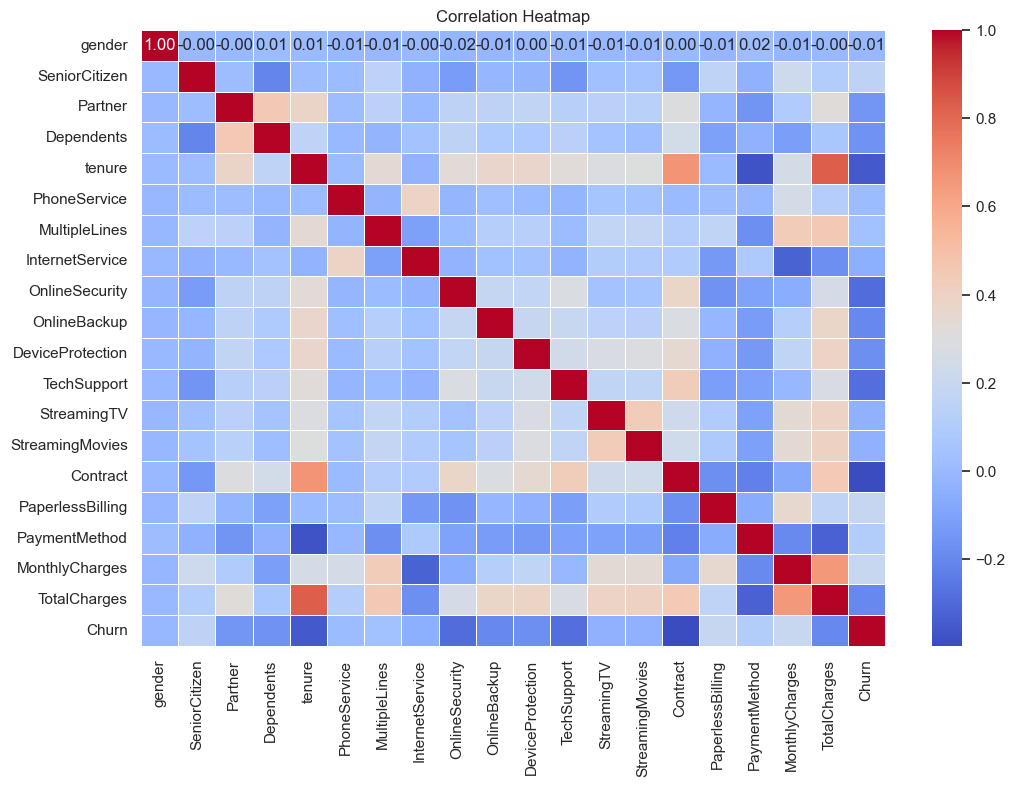

In [17]:
#  Compute correlation matrix and visualize it
corr_matrix = df.corr()
#  Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",  cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
#Split into X and y
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Model Training and Evaluation

In [19]:
# import the necessary libaries

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [20]:
#Split the data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
lg = LGBMClassifier(random_state=42, class_weight='balanced')
lg.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [25]:
# Training the model, 
xgb = XGBClassifier( eval_metric='logloss', random_state=42, scale_pos_weight = 2.77) # scale_pos_weight = (1 - 0.265) / 0.265 ≈ 2.77 since the data is imbalanced
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [23]:
#model evaluation
models = {'LightGBM': lg, 'XGBoost' : xgb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


LightGBM Performance:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1035
           1       0.54      0.76      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409

[[790 245]
 [ 91 283]]
ROC AUC Score: 0.8347361078818879

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.53      0.70      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.76      0.77      1409

[[807 228]
 [114 260]]
ROC AUC Score: 0.8194115063680281


In [26]:
#It appears this is an imbalanced dataset
#Check the proportion of the data

y.value_counts(normalize= True) * 100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [27]:
# I will use Smote to handle the problem
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [28]:
# Confirm SMOTE implementation has improved the perfomamnce of the model
lbm = LGBMClassifier(random_state=42, force_col_wise= True)
lbm.fit(X_resampled, y_resampled)
y_pr = lbm.predict(X_test)
print(classification_report(y_test, y_pr))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5174, number of negative: 5174
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 10348, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1035
           1       0.69      0.73      0.71       374

    accuracy                           0.84      1409
   macro avg       0.80      0.81      0.80      1409
weighted avg       0.85      0.84      0.84      1409



In [29]:
# Search for the best parameters
# Define the LightGBM model
model = LGBMClassifier()

# Define the parameter grid to search
param_grid = {
    'num_leaves': [31, 40],
    'max_depth': [10, 20],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200],
    'min_child_samples': [10, 20],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the grid search
grid_search.fit(X_resampled, y_resampled)


# Evaluate on test data
y_prediction = grid_search.predict(X_test)
print(classification_report(y_test, y_prediction))

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3449, number of negative: 3449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 6898, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3450, number of negative: 3449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [In

In [30]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 40, 'subsample': 0.8}


In [31]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1035
           1       0.93      0.98      0.95       374

    accuracy                           0.97      1409
   macro avg       0.96      0.98      0.97      1409
weighted avg       0.97      0.97      0.97      1409



In [32]:
# Print the Confusion Matrix
print(confusion_matrix(y_prediction, y_test))

[[1006    8]
 [  29  366]]


# Plotting Feature importance

In [33]:
# Get feature importance as a Series
from lightgbm import plot_importance


best_lgm = grid_search.best_estimator_

feat_imp = pd.Series(best_lgm.feature_importances_, index=X.columns)

# Sort and show top 10
print(feat_imp.sort_values(ascending=False).head(10))

MonthlyCharges                    1959
TotalCharges                      1919
tenure                            1184
gender_Male                        274
PaperlessBilling_Yes               199
PaymentMethod_Electronic check     182
Partner_Yes                        172
DeviceProtection_Yes               157
OnlineBackup_Yes                   152
Dependents_Yes                     150
dtype: int32


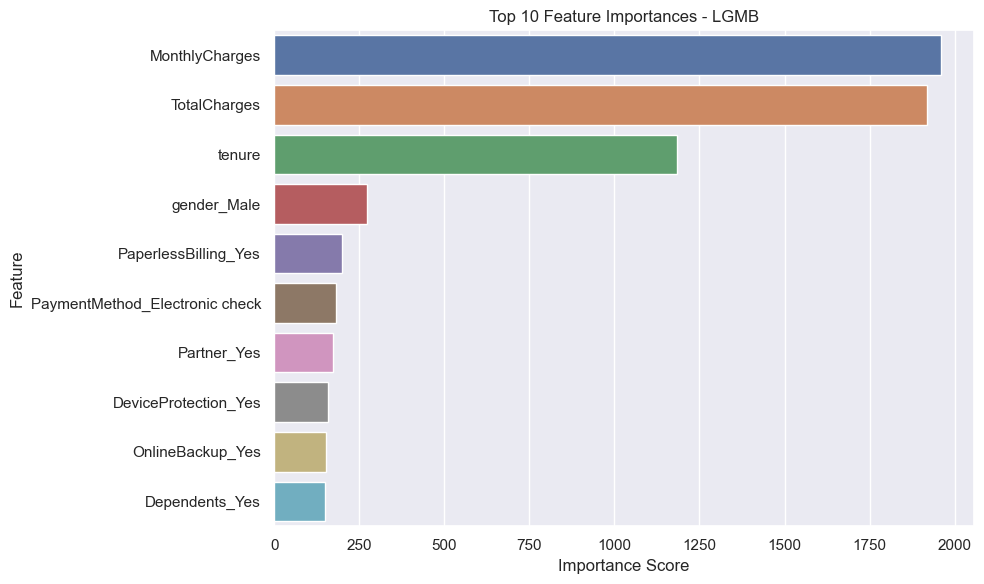

In [34]:
top_features = feat_imp.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Feature Importances - LGMB')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()